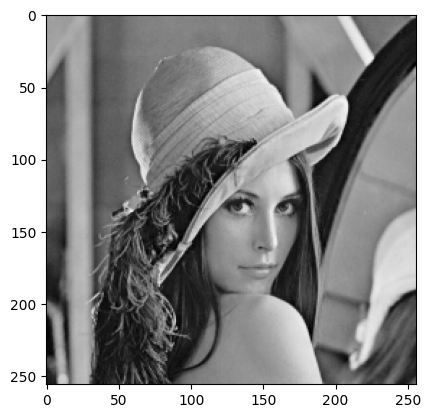

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
%load_ext autoreload
%autoreload 2

img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
plt.imshow(img, cmap='gray')


In [38]:
from compressor.image import Image
k = 4
num_qubits = np.floor(np.log2(k**2)).astype(int)
num_layers = num_qubits
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (12, 12))
image_obj = Image(img, k)
image_obj.find_thetas(num_layers = num_layers)

Block at (1,1) is finding thetas by itself
Achieved error threshold at step 60
Block at (2,1) is transfered
Achieved error threshold at step 83
Block at (2,2) is transfered
Achieved error threshold at step 53
Block at (2,0) is transfered
Achieved error threshold at step 43
Block at (0,2) is transfered
Achieved error threshold at step 50
Block at (0,0) is transfered
Achieved error threshold at step 69
Block at (1,2) is transfered
Achieved error threshold at step 30
Block at (1,0) is transfered
Achieved error threshold at step 41
Block at (0,1) is transfered
Achieved error threshold at step 32


In [41]:
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (12, 12))
image_obj = Image(img, k)
image_obj.find_thetas_naive(num_layers = num_layers)

Achieved error threshold at step 64
Achieved error threshold at step 74
Achieved error threshold at step 98
Achieved error threshold at step 70
Achieved error threshold at step 78
Achieved error threshold at step 73
Achieved error threshold at step 71


In [13]:
from compressor.image import Image
k = 4
for k in [2]:
    for image in ['lenna.png', 'cameraman.jpg']:
        for size in [8]:
            num_qubits = np.floor(np.log2(k**2)).astype(int)
            num_layers = num_qubits
            img = cv2.imread(f'./images/{image}', cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (size, size))
            image_obj = Image(img, k)
            image_obj.find_thetas(num_layers = num_layers)
            print(image_obj.get_min_stepss())
            np.savetxt(f'./data/{image}_k={k}_size={size}_num_steps_optimal.txt', image_obj.get_min_stepss(), fmt='%d')
            print(image_obj.get_costs())
            np.savetxt(f'./data/{image}_k={k}_size={size}_costs_optimal.txt', image_obj.get_costs())
            np.savetxt(f'./data/{image}_k={k}_size={size}_percent_transfer_optimal.txt', [image_obj.get_num_transfered()])


Block at (1,0) is finding thetas by itself
Achieved error threshold at step 55
55
Block at (0,1) is transfered
Achieved error threshold at step 17
17
Block at (0,3) is finding thetas by itself
Achieved error threshold at step 66
66
Block at (2,2) is finding thetas by itself
Achieved error threshold at step 54
54
Block at (0,2) is transfered
Achieved error threshold at step 14
14
Block at (2,3) is transfered
Achieved error threshold at step 28
28
Block at (1,3) is transfered
Achieved error threshold at step 30
30
Block at (2,1) is transfered
Achieved error threshold at step 19
19
Block at (1,2) is transfered
Achieved error threshold at step 10
10
Block at (3,1) is transfered
Achieved error threshold at step 19
19
Block at (3,0) is transfered
Achieved error threshold at step 26
26
Block at (3,2) is transfered
Achieved error threshold at step 9
9
Block at (1,1) is transfered
Achieved error threshold at step 3
3
Block at (2,0) is transfered
Achieved error threshold at step 11
11
Block at (

In [12]:
np.savetxt('image_array.txt', img, fmt='%d')

In [39]:
image_obj.get_costs()

[0.0009969225634864909,
 0.0008446709732577995,
 0.0009669094980117032,
 0.0008461954101390834,
 0.0008452929585865965,
 0.000737430429519903,
 0.0008901694505694113,
 0.0009556692681951251,
 0.0009134847874060492]

In [40]:
image_obj.get_num_stepss()

[69, 32, 50, 41, 60, 30, 43, 83, 53]

In [26]:
image_obj.get_num_transfered()/image_obj.num_blocks

0.7777777777777778